In [1]:
# Make plots interactive
%matplotlib inline
# Import dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load files into DataFrames
city_data_csv=os.path.join('Resources','city_data.csv')
ride_data_csv=os.path.join('Resources','ride_data.csv')
city_data_df=pd.read_csv(city_data_csv)
ride_data_df=pd.read_csv(ride_data_csv)

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Count the number of cells in each column that aren't null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data points from the Urban cities
sum(city_data_df['type']=='Urban')
# sum(city_data_df['type']=='Suburban')
# sum(city_data_df['type']=='Rural')

66

In [14]:
# Count the number of cells in each column that aren't null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [18]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Create the Urban city DataFrame
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban'].copy()
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban city DataFrame
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban'].copy()
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
# Create the Rural city DataFrame
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural'].copy()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [26]:
# Get the number of rides for urban cities
urban_ride_count_s=urban_cities_df.groupby(['city'])['city'].count()
urban_ride_count_s.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: city, dtype: int64

In [27]:
# Get the number of rides for suburban cities
suburban_ride_count_s=suburban_cities_df.groupby(['city'])['city'].count()
suburban_ride_count_s.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: city, dtype: int64

In [28]:
# Get the number of rides for rural cities
rural_ride_count_s=rural_cities_df.groupby(['city'])['city'].count()
rural_ride_count_s.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: city, dtype: int64

In [29]:
# Get average fare for each city in the urban cities
urban_avg_fare_s=urban_cities_df.groupby(['city'])['fare'].mean()
urban_avg_fare_s.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [30]:
# Get average fare for each city in the suburban cities
suburban_avg_fare_s=suburban_cities_df.groupby(['city'])['fare'].mean()
suburban_avg_fare_s.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [31]:
# Get average fare for each city in the rural cities
rural_avg_fare_s=rural_cities_df.groupby(['city'])['fare'].mean()
rural_avg_fare_s.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [32]:
# Get the average number of drivers for each urban city
urban_driver_count_s=urban_cities_df.groupby(['city'])['driver_count'].mean()
urban_driver_count_s.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [33]:
# Get the average number of drivers for each suburban city
suburban_driver_count_s=suburban_cities_df.groupby(['city'])['driver_count'].mean()
suburban_driver_count_s.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [34]:
# Get the average number of drivers for each rural city
rural_driver_count_s=rural_cities_df.groupby(['city'])['driver_count'].mean()
rural_driver_count_s.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

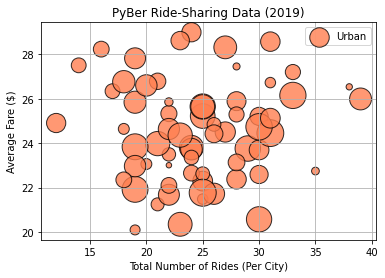

In [39]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count_s,urban_avg_fare_s,
           s=10*urban_driver_count_s,c='coral',edgecolor='k',linewidths=1,alpha=.8,label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()
plt.show()

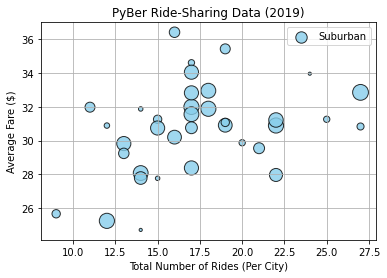

In [40]:
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count_s,suburban_avg_fare_s,
           s=10*suburban_driver_count_s,c='skyblue',edgecolor='k',linewidths=1,alpha=.8,label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()
plt.show()

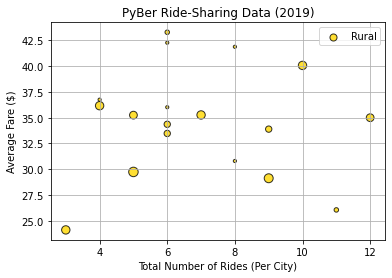

In [42]:
# Build the scatter plots for rural cities
plt.scatter(rural_ride_count_s,rural_avg_fare_s,
           s=10*rural_driver_count_s,c='gold',edgecolor='k',linewidths=1,alpha=.8,label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()
plt.show()

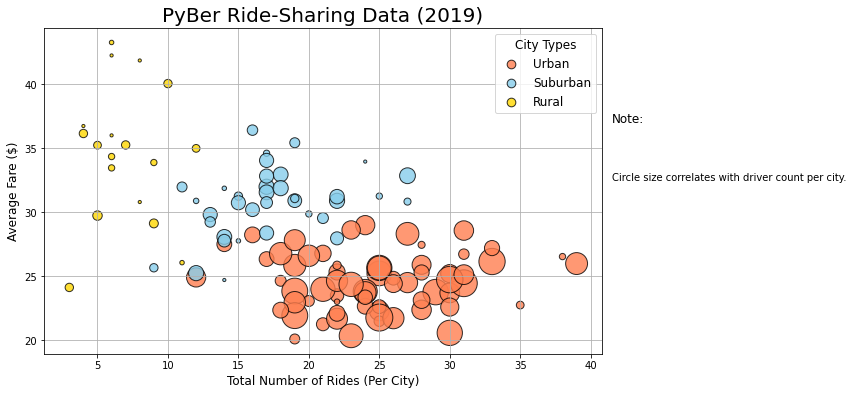

In [82]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count_s,urban_avg_fare_s,
           s=10*urban_driver_count_s,c='coral',edgecolor='k',linewidths=1,alpha=.8,label='Urban')
plt.scatter(suburban_ride_count_s,suburban_avg_fare_s,
           s=10*suburban_driver_count_s,c='skyblue',edgecolor='k',linewidths=1,alpha=.8,label='Suburban')
plt.scatter(rural_ride_count_s,rural_avg_fare_s,
           s=10*rural_driver_count_s,c='gold',edgecolor='k',linewidths=1,alpha=.8,label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fare ($)',fontsize=12)
plt.grid()
lgnd=plt.legend(fontsize=12,mode='Expanded',scatterpoints=1,loc='best',title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
plt.text(41.5,37,'Note:',fontsize=12)
plt.text(41.5,32.5,'Circle size correlates with driver count per city.',fontsize=10,wrap=True)
Fig1_png=os.path.join('Analysis','Fig1.png')
plt.savefig(Fig1_png)
plt.show()